In [10]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

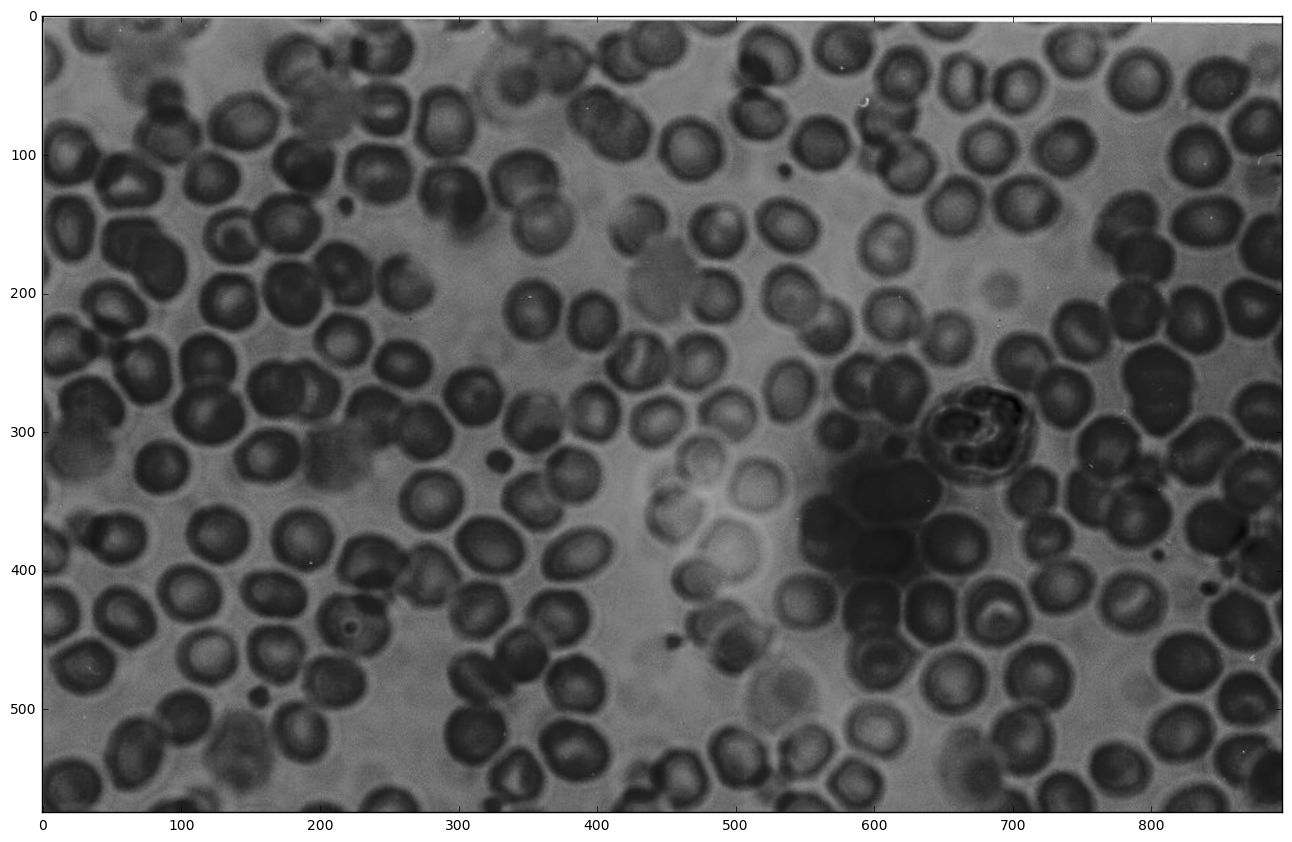

In [11]:
img_blood = cv2.cvtColor(cv2.imread('../../images/bloodcells.jpg'), cv2.COLOR_BGR2RGB)
img_blood_gs = cv2.cvtColor(img_blood, cv2.COLOR_RGB2GRAY) # konvert u grayscale)
plt.imshow(img_blood_gs, 'gray')

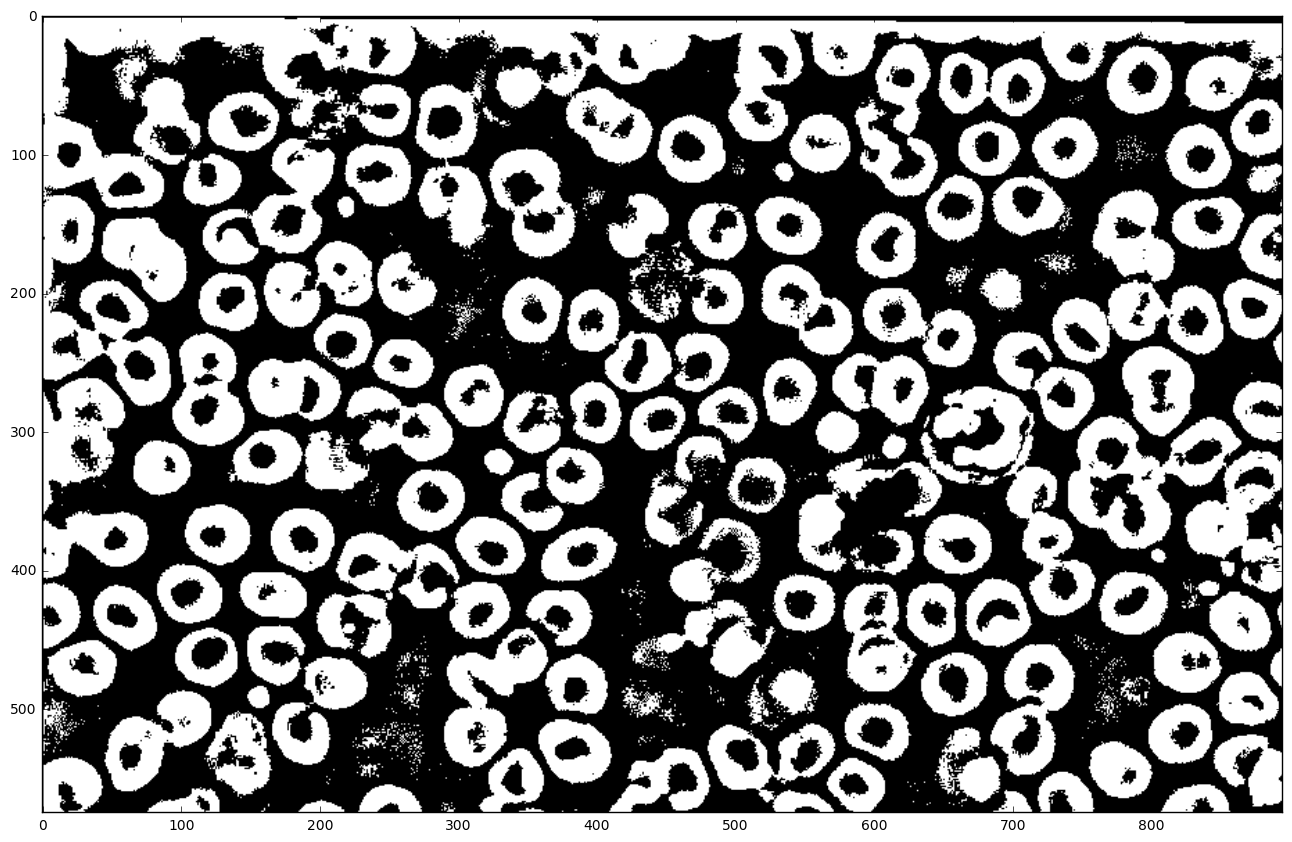

In [ ]:
img_blood_bin = cv2.adaptiveThreshold(img_blood_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY_INV, 45,  5)
# ret, img_blood_bin = cv2.threshold(img_blood_gs, 0, 255, cv2.THRESH_OTSU)
# ret, img_blood_bin = cv2.threshold(img_blood_gs, 80, 255, cv2.THRESH_BINARY)
plt.imshow(img_blood_bin, 'gray')

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# image_edges = cv2.dilate(img_blood_bin, kernel, iterations=1) - cv2.erode(img_blood_bin, kernel, iterations=1)
# plt.imshow(image_edges, 'gray')
# #img_blood_bin = image_edges

# edge_detected_image = cv2.Canny(img_blood_bin, 20, 10)
# plt.imshow(edge_detected_image, 'gray')
# img_blood_bin = edge_detected_image

In [ ]:
img, contours, hierarchy = cv2.findContours(img_blood_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contours_blood = []
for contour in contours: 
    center, size, angle = cv2.minAreaRect(contour) 
    height, width = size
    area = cv2.contourArea(contour)
    x, y = center;
    if width > 20 and width < 200 and height > 20 and height < 200:
        contours_blood.append(contour)
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img_blood,[box],0,(0,0,255),2)
    
img = img_blood.copy()
cv2.drawContours(img, contours_blood, -1, (255, 0, 0), 1)
plt.imshow(img)
print 'Ukupan broj crvenih zrnaca: %d' % len(contours_blood)


Ukupan broj crvenih zrnaca: 120
